# Naive Bayes Classification

## Introduction to the Iris Dataset and Probabilistic Classification

### The Iris Dataset: A Botanical Classification Challenge

#### Dataset Background
The Iris dataset is a classic and foundational dataset in machine learning, collected by botanist Edgar Anderson in 1936. It contains measurements of three different species of Iris flowers:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

#### Feature Measurements
For each flower, the dataset includes four key measurements (in centimeters):
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

### Intuitive Problem Framing

**Imagine you're a botanist trying to identify Iris species based on flower measurements.**

- You have historical data of flower measurements for each species
- Your goal: Predict the species of a new flower based on its measurements

This is a perfect scenario for Naive Bayes classification!

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

### Exploratory Data Analysis

Let's first understand the characteristics of our Iris dataset.

In [11]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a DataFrame for easier analysis
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# Display basic statistics
print(iris_df.groupby('species').describe())

           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
sp

C:\Users\odys_\AppData\Local\Temp\ipykernel_21056\317179258.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(iris_df.groupby('species').describe())


### Visualizing Species Characteristics

We'll create visualizations to understand how different species differ in their measurements.

<Figure size 1200x1000 with 0 Axes>

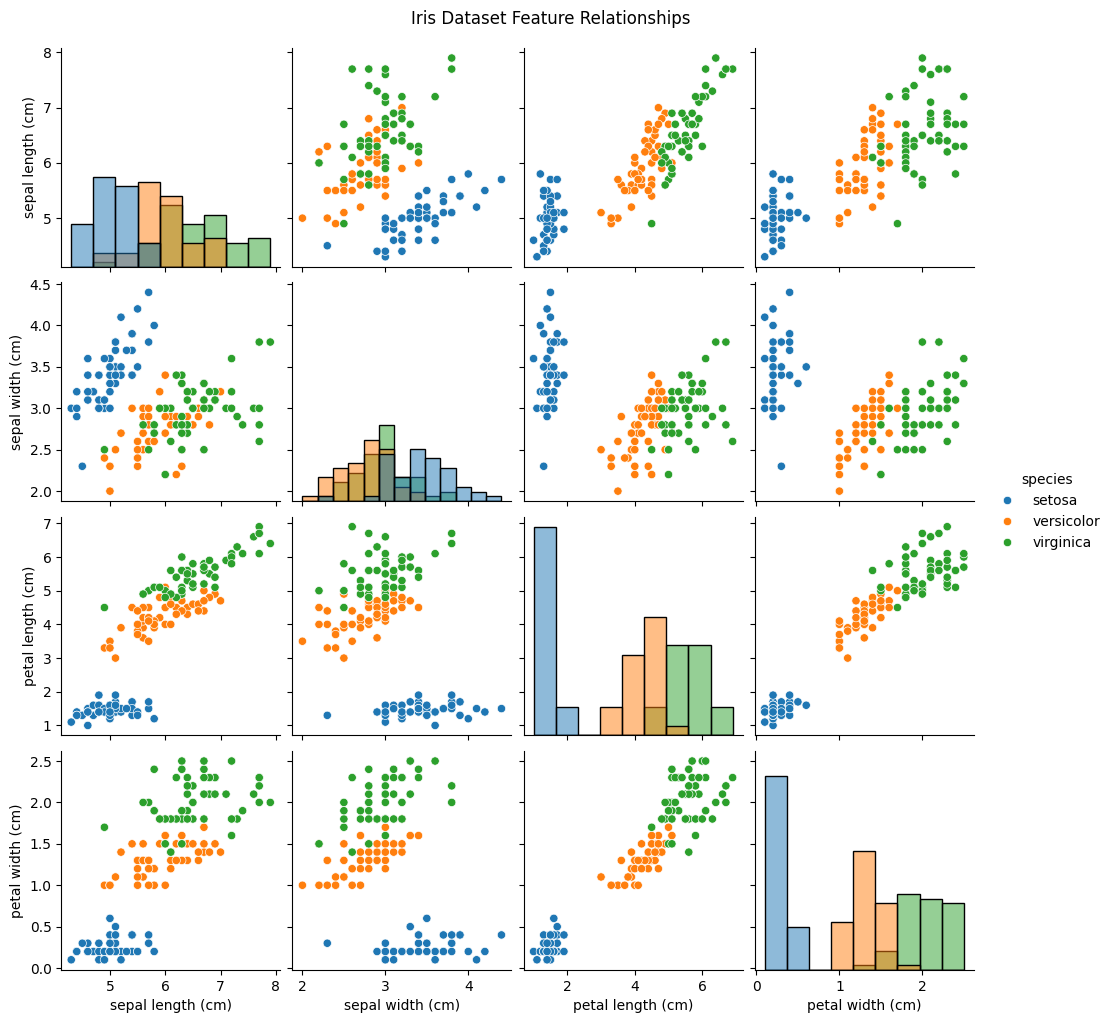

In [12]:
# Pairplot to visualize feature relationships
plt.figure(figsize=(12, 10))
sns.pairplot(iris_df, hue='species', diag_kind='hist')
plt.suptitle('Iris Dataset Feature Relationships', y=1.02)
plt.show()

## Naive Bayes: Mathematical Foundations

### Bayes' Theorem for Iris Classification
In our Iris classification problem, we want to calculate the **posterior probability** of a species given the measurements:

$$
P(Species|Measurements) = \frac{P(Measurements|Species) \times P(Species)}{P(Measurements)}
$$

where:

- $P(Species)$: Prior probability of each Iris species  
- $P(Measurements|Species)$: Likelihood of these measurements for a given species  
- $P(Measurements)$: Overall probability of these measurements (acts as a normalizing constant)  

---

### The 'Naive' Assumption
We assume that the individual features (measurements) are conditionally independent given the class. Therefore, the joint likelihood simplifies to the product of individual likelihoods:

$$
P(Measurements|Species) = \prod_{i=1}^{4} P(Measurement_i|Species)
$$

where each feature $Measurement_i$ is treated as independent of the others.

---

### Maximum Likelihood Estimation (MLE)
To compute the likelihood terms $P(Measurement_i|Species)$, we use **Maximum Likelihood Estimation**:

1. **For continuous features**  
   If the features are continuous and normally distributed (Gaussian Naive Bayes), the likelihood is modeled as:

$$
P(Measurement_i|Species) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x_i - \mu)^2}{2\sigma^2} \right)
$$

where:  
- $\mu$ = mean of the feature for the given class  
- $\sigma^2$ = variance of the feature for the given class  

MLE estimates $\mu$ and $\sigma^2$ as:

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

2. **For categorical features**  
If the features are categorical (Multinomial Naive Bayes), the likelihood is estimated as:

$$
P(Measurement_i = k | Species) = \frac{\text{count}(Measurement_i = k \cap Species)}{\text{count}(Species)}
$$

where the MLE estimate is simply the frequency of each feature value within the class.

---

### Log-Likelihood Simplification
To avoid numerical underflow and simplify computation, we use the **log-likelihood** instead of the raw likelihood:

The posterior probability becomes:

$$
P(Species | Measurements) \propto P(Species) \prod_{i=1}^{4} P(Measurement_i | Species)
$$

Taking the **log** of both sides gives:

$$
\log P(Species | Measurements) \propto \log P(Species) + \sum_{i=1}^{4} \log P(Measurement_i | Species)
$$

1. **For continuous features** (Gaussian likelihood):

$$
\log P(Measurement_i | Species) = -\frac{1}{2} \log(2\pi\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2}
$$

2. **For categorical features** (Multinomial likelihood):

$$
\log P(Measurement_i | Species) = \log \frac{\text{count}(Measurement_i = k \cap Species)}{\text{count}(Species)}
$$

---

### Final Decision Rule
The classifier assigns the class with the highest **log posterior**:

$$
\hat{y} = \arg\max_{k} \Bigg( \log P(Species_k) + \sum_{i=1}^{4} \log P(Measurement_i | Species_k) \Bigg)
$$

- The log transformation converts the product of probabilities into a sum of log probabilities, which is computationally stable and prevents underflow.  
- The normalization term $\log P(Measurements)$ can be ignored since it's constant for a given input.  

---

### Why Log-Likelihood is Better
✅ Avoids numerical underflow with small probabilities  
✅ Converts multiplication into addition for computational efficiency  
✅ Ensures stability in gradient-based optimization  

---

### Why the Naive Assumption Works (Even Though It's Wrong)
- The independence assumption is rarely true in practice.  
- However, Naive Bayes often works well because the joint likelihood is dominated by the correct class even when the independence assumption is violated.  

---

## Custom Naive Bayes Implementation for Iris Classification

In [13]:
class IrisNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_probs = None
        self.feature_means = None
        self.feature_vars = None
    
    def _gaussian_pdf(self, x, mean, var):
        """Gaussian Probability Density Function"""
        return np.exp(-((x - mean)**2) / (2 * var)) / np.sqrt(2 * np.pi * var)
    
    def fit(self, X, y):
        # Unique classes
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # Prior probabilities
        self.class_probs = {}
        self.feature_means = {}
        self.feature_vars = {}
        
        for c in self.classes:
            # Data for this class
            X_c = X[y == c]
            
            # Prior probability
            self.class_probs[c] = len(X_c) / n_samples
            
            # Feature statistics
            self.feature_means[c] = X_c.mean(axis=0)
            self.feature_vars[c] = X_c.var(axis=0)
        
        return self
    
    def predict(self, X):
        return np.array([self._predict(x) for x in X])
    
    def _predict(self, x):
        # Store posteriors
        posteriors = {}
        
        for c in self.classes:
            # Start with log of prior
            prior = np.log(self.class_probs[c])
            
            # Calculate log likelihood for each feature
            likelihood = np.sum(np.log(
                self._gaussian_pdf(
                    x, 
                    self.feature_means[c], 
                    self.feature_vars[c]
                )
            ))
            
            # Posterior is prior + likelihood
            posteriors[c] = prior + likelihood
        
        # Return class with highest posterior
        return max(posteriors, key=posteriors.get)

## Model Training and Evaluation

In [14]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train custom Naive Bayes
custom_nb = IrisNaiveBayes()
custom_nb.fit(X_train_scaled, y_train)

# Predictions
custom_predictions = custom_nb.predict(X_test_scaled)

# Compare with Scikit-learn's implementation
sklearn_nb = GaussianNB()
sklearn_nb.fit(X_train_scaled, y_train)
sklearn_predictions = sklearn_nb.predict(X_test_scaled)

# Evaluation
print("Custom Naive Bayes Classification Report:")
print(classification_report(y_test, custom_predictions, target_names=iris.target_names))

print("\nScikit-learn Naive Bayes Classification Report:")
print(classification_report(y_test, sklearn_predictions, target_names=iris.target_names))

Custom Naive Bayes Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Scikit-learn Naive Bayes Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Visualization of Classification Results

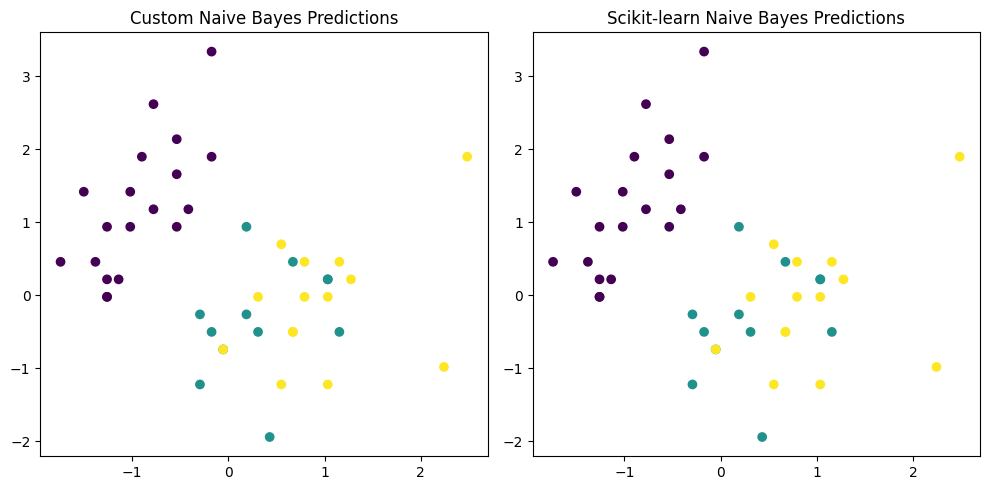

: 

In [ ]:
# Visualize prediction comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Custom Naive Bayes Predictions")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=custom_predictions, cmap='viridis')

plt.subplot(1, 2, 2)
plt.title("Scikit-learn Naive Bayes Predictions")
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=sklearn_predictions, cmap='viridis')

plt.tight_layout()
plt.show()

## Key Insights and Limitations

### Why Naive Bayes Works Well for Iris Classification

1. **Probabilistic Reasoning**: Handles uncertainty in measurements
2. **Simple Assumptions**: Works well when features are roughly independent
3. **Low Computational Complexity**: Efficient for small to medium datasets

### Limitations

1. Assumes feature independence
2. Sensitive to correlated features
3. Assumes equal feature importance

## Conclusion

Naive Bayes provides an intuitive, probabilistic approach to classification, balancing simplicity with predictive power. The Iris dataset serves as an excellent example of how this algorithm can effectively distinguish between species based on measured characteristics.